*Importing the data using goodle drive* 



In [ ]:
# connect to google drive to import data
from google.colab import drive
#need to input a key to connect to your drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd 
import matplotlib
df = pd.read_csv('/content/drive/My Drive/trans.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   trans_id    1048575 non-null  int64  
 1   account_id  1048575 non-null  int64  
 2   date        1048575 non-null  int64  
 3   type        1048575 non-null  object 
 4   operation   869912 non-null   object 
 5   amount      1048575 non-null  float64
 6   balance     1048575 non-null  float64
 7   k_symbol    569929 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 64.0+ MB


In [ ]:
df.describe()

,trans_id,account_id,date,amount,balance
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.327034e+06,2.936277e+03,9.655599e+05,5.942088e+03,3.845673e+04
std,1.222294e+06,2.477151e+03,1.393231e+04,9.529394e+03,2.206851e+04
min,1.000000e+00,1.000000e+00,9.301010e+05,0.000000e+00,-4.112570e+04
25%,4.280845e+05,1.204000e+03,9.601130e+05,1.359000e+02,2.238840e+04
50%,8.554380e+05,2.434000e+03,9.704060e+05,2.100000e+03,3.309880e+04
75%,1.982606e+06,3.659000e+03,9.802120e+05,6.817000e+03,4.950220e+04
max,3.682986e+06,1.138200e+04,9.812190e+05,8.740000e+04,2.096370e+05


**Installing tgan package using pip command**

In [ ]:
pip install tgan

     |████████████████████████████████| 110.5MB 90kB/s 
     |████████████████████████████████| 276kB 41.4MB/s 
     |████████████████████████████████| 51kB 4.8MB/s 
     |████████████████████████████████| 3.8MB 42.4MB/s 
     |████████████████████████████████| 512kB 43.8MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=afe72daca577a14e6b52ac782a290d51d71efe2e98f51755e3b9df44a2ea6aae
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: gas

**Loading the dataset using pandas library package**

In [ ]:
import pandas as pd
df = pd.read_csv("trans.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104871 entries, 0 to 104870
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   trans_id    104871 non-null  int64  
 1   account_id  104871 non-null  int64  
 2   date        104871 non-null  int64  
 3   type        104871 non-null  object 
 4   operation   85734 non-null   object 
 5   amount      104871 non-null  float64
 6   balance     104871 non-null  float64
 7   k_symbol    54145 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 6.4+ MB


**Data Preparation**

In [ ]:
#Checking Null values in each column
df.isnull().sum()

trans_id           0
account_id         0
date               0
type               0
operation     178663
amount             0
balance            0
k_symbol      478646
dtype: int64

In [ ]:
# Filling the missing values
df = df.fillna(value='unspecified')

# print unique, found that some elements of 'k_symbol' is "space", so replace the 'space' with 'unspecified'
df = df.replace(' ', 'unspecified')

In [ ]:
df.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,unspecified
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,unspecified
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,unspecified
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,unspecified
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,unspecified


*Checking for Duplicates Values*

In [ ]:
print(f'Duplicate values = {df.duplicated().sum()}')

Duplicate values = 0


*Taking a random sample of 1000 observations from the dataset and loading it into prepared. If we consider more than 5000 samples, the session will crash due to RAM issues while fitting the model*

In [ ]:
prepared=df.sample(n=10000, replace=False, random_state=1)  
prepared.shape

(10000, 8)

In [ ]:
# Creating a list with name of the columns
continuous_columns = ['trans_id','account_id','date','amount','balance','type','operation','k_symbol']

**Importing the Tabular GANS model from tgan package**

In [ ]:
from tgan.model import TGANModel
tgan = TGANModel(continuous_columns, max_epoch = 1, steps_per_epoch = 100)

**Model Preparation**

In [ ]:
# Training the model with the prepared data 
tgan.fit(prepared)




[0824 10:16:03 @input_source.py:222] Setting up the queue 'QueueInput/input_queue' for CPU prefetching ...








Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
[0824 10:16:03 @registry.py:126] gen/LSTM/00/FC input: [200, 100]

Instructions for updating:
Please use `layer.__call__` method instead.
[0824 10:16:03 @registry.py:134] gen/LSTM/00/FC output: [200, 100]
[0824 10:16:03 @registry.py:126] gen/LSTM/00/FC2 input: [200, 100]
[0824 10:16:03 @registry.py:134] gen/LSTM/00/FC2 output: [200, 10000]
[0824 10:16:03 @registry.py:126] gen/LSTM/00/FC3 input: [200, 10000]
[0824 10:16:04 @registry.py:134] gen/LSTM/00/FC3 output: [200, 100]
[0824 10:16:04 @registry.py:126] gen/LSTM/01/FC input: [200, 100]
[0824 10:16:04 @r

 99%|#########9|99/100[01:14<00:00, 1.38it/s]

100%|##########|100/100[01:17<00:00, 1.28it/s]

[0824 10:17:31 @base.py:285] Epoch 1 (global_step 100) finished, time:1 minute 17 seconds.



[0824 10:17:31 @saver.py:79] Model saved to output/model/model-100.
[0824 10:17:31 @monitor.py:467] GAN_loss/discrim/accuracy_fake: 0.79
[0824 10:17:31 @monitor.py:467] GAN_loss/discrim/accuracy_real: 0.42
[0824 10:17:31 @monitor.py:467] GAN_loss/discrim/loss: 0.65882
[0824 10:17:31 @monitor.py:467] GAN_loss/gen/final-g-loss: 1.2735
[0824 10:17:31 @monitor.py:467] GAN_loss/gen/klloss: 0.022169
[0824 10:17:31 @monitor.py:467] GAN_loss/gen/loss: 1.2514
[0824 10:17:31 @monitor.py:467] QueueInput/queue_size: 50
[0824 10:17:31 @base.py:289] Training has finished!

[0824 10:17:32 @input_source.py:178] EnqueueThread QueueInput/input_queue Exited.

[0824 10:17:33 @collection.py:146] New collections created in tower : tf.GraphKeys.REGULARIZATION_LOSSES
[0824 10:17:33 @collection.py:165] These collections were modified but restored in : (tf.GraphKeys.SUMMARIES: 0->2)


[0824 10:17:33 @sessinit.py:87] WRN The following variables are in the checkpoint, but not found in the graph: global_step, opti

**Synthetic data generation**

In [ ]:
# Generating synthetic data 
num_samples = 10000
samples = tgan.sample(num_samples)
samples.head(3).T[:10]

 24%|##4       |49/200[00:07<00:21, 6.94it/s]


,0,1,2
trans_id,3630068,3538663,1436937
account_id,2780,2059,2968
date,980408,950319,931214
type,PRIJEM,PRIJEM,VYDAJ
operation,PREVOD NA UCET,unspecified,VYBER
amount,23908.0,51800.0,6001.0
balance,30399.9,44913.1,118599.2
k_symbol,unspecified,UROK,unspecified


*Loading the generated synthetic data to a new dataframe known as 'new_data'*

In [ ]:
new_data = pd.DataFrame(samples)

In [ ]:
# Displaying the first five observations of the new data
samples.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol
0,3630068,2780,980408,PRIJEM,PREVOD NA UCET,23908.0,30399.9,unspecified
1,3538663,2059,950319,PRIJEM,unspecified,51800.0,44913.1,UROK
2,1436937,2968,931214,VYDAJ,VYBER,6001.0,118599.2,unspecified
3,1743633,720,980430,PRIJEM,PREVOD Z UCTU,2848.0,106892.0,DUCHOD
4,3571892,3452,941117,VYDAJ,VYBER,5836.0,27242.7,unspecified


**Comparison of Original data and Synthetic Data**

***1. Using Density plots for Numerical variables and Histograms for Categorical variables***

***Density plots for Trans_id and Account_id column***

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


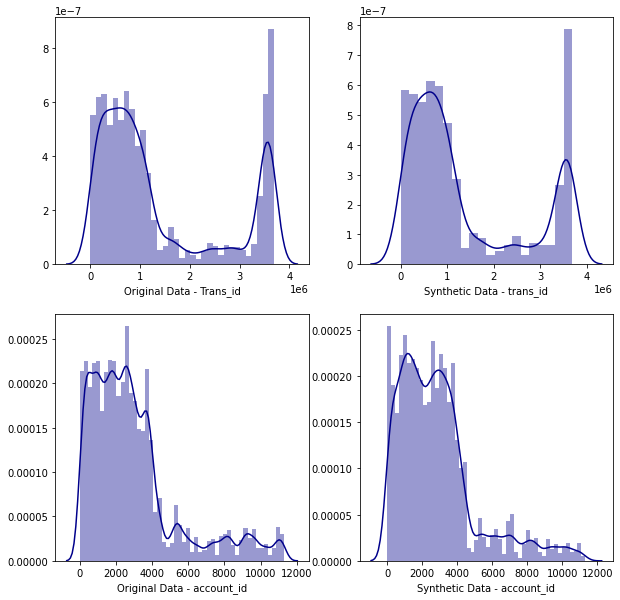

In [ ]:
# Building Density plots to compare the original data and the synthetic data
import matplotlib.pyplot as plt
import seaborn as sns

# Comparison between the Original Data and the Synthetic Data (Trans_id and Account_id variable)
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.distplot(df.trans_id , color="darkblue", ax=axes[0,0], axlabel='Original Data - Trans_id')
sns.distplot(new_data.trans_id , color="darkblue", ax=axes[0,1], axlabel='Synthetic Data - trans_id')

sns.distplot(df.account_id , color="darkblue", ax=axes[1,0], axlabel='Original Data - account_id')
sns.distplot(new_data.account_id , color="darkblue", ax=axes[1,1], axlabel='Synthetic Data - account_id')

plt.show();


***Density plots for Date column***





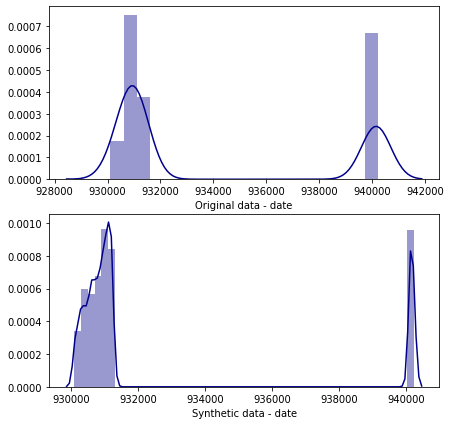

In [ ]:
fig, axes = plt.subplots(2 ,figsize=(7, 7))
sns.distplot(df.date , color="darkblue", ax=axes[0], axlabel='Original data - date')
sns.distplot(new_data.date , color="darkblue", ax=axes[1], axlabel='Synthetic data - date')

***Density plots for Balance and Amount columns***

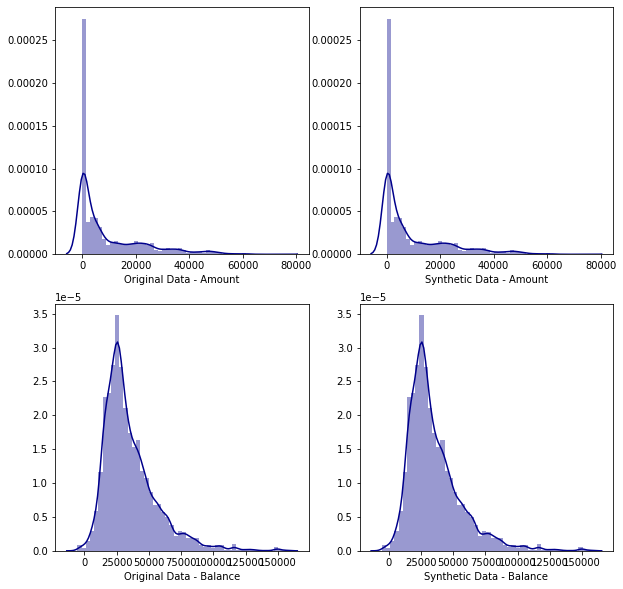

In [ ]:
fig, axes = plt.subplots(2,2 , figsize=(10, 10))

sns.distplot(new_data.amount , color="darkblue", ax=axes[0,0], axlabel='Original Data - Amount')
sns.distplot(new_data.amount , color="darkblue", ax=axes[0,1], axlabel='Synthetic Data - Amount')

sns.distplot(new_data.balance, color="darkblue", ax=axes[1,0], axlabel='Original Data - Balance')
sns.distplot(new_data.balance, color="darkblue", ax=axes[1,1], axlabel='Synthetic Data - Balance')
plt.show();

***Histograms for Categorical Varibles***

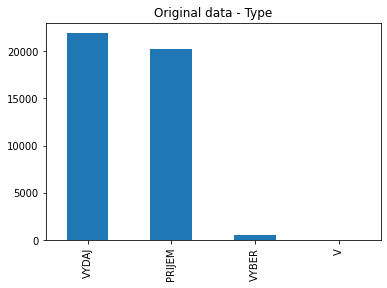

In [ ]:
# Type column - Original data
df['type'].value_counts().plot(kind='bar',title = 'Original data - Type')

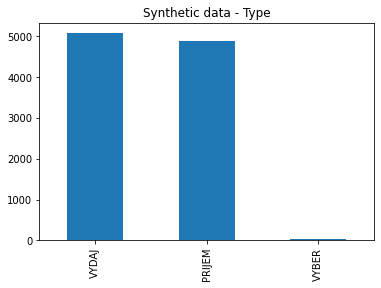

In [ ]:
# Type column - Synthetic data
new_data['type'].value_counts().plot(kind='bar', title = 'Synthetic data - Type')

***Histogram for Operation column***

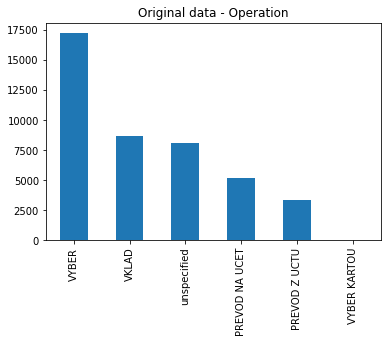

In [ ]:
# Operation column - Original Data
df['operation'].value_counts().plot(kind='bar',title = 'Original data - Operation')

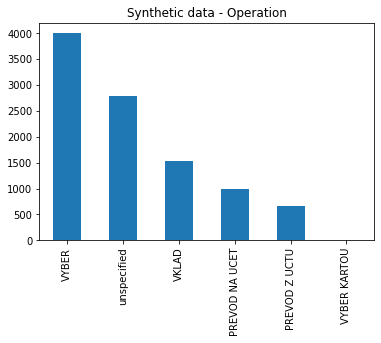

In [ ]:
# Operation column - Synethtic data 
new_data['operation'].value_counts().plot(kind='bar',title = 'Synthetic data - Operation')

***Histogram for k_symbol column***

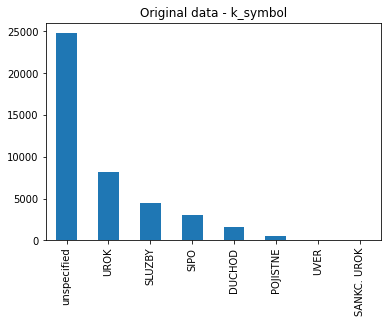

In [ ]:
# k_symbol - Original Data
df['k_symbol'].value_counts().plot(kind='bar',title = 'Original data - k_symbol')

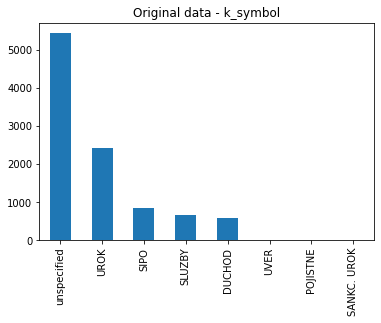

In [ ]:
#k_symbol - Synthetic Data
new_data['k_symbol'].value_counts().plot(kind='bar',title = 'Original data - k_symbol')

***2. KL Divergence Test***

In [ ]:
# KL Divergence for 'Type' column

df['type'].value_counts(ascending = True)

VYBER      16471
PRIJEM    400209
VYDAJ     631895
Name: type, dtype: int64

In [ ]:
samples['type'].value_counts(ascending = True)

VYBER       37
PRIJEM    4068
VYDAJ     5895
Name: type, dtype: int64

P=1.000 Q=1.000


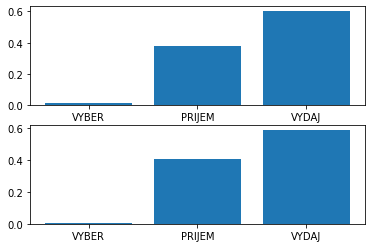

In [ ]:
from matplotlib import pyplot
type = ['VYBER', 'PRIJEM', 'VYDAJ']
p = [16471/1048575, 400209/1048575, 631895/1048575]
q = [ 37/10000, 4068/10000, 5895/10000]
print('P=%.3f Q=%.3f' % (sum(p), sum(q)))
# plot first distribution
pyplot.subplot(2,1,1)
pyplot.bar(type, p)
# plot second distribution
pyplot.subplot(2,1,2)
pyplot.bar(type, q)
# show the plot
pyplot.show()

In [ ]:
from math import log2
# calculate the kl divergence
def kl_divergence(p, q):
    return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))

# calculate (P || Q)
kl_pq = kl_divergence(p, q) 
print(kl_pq)

0.016794284981456596


In [ ]:
# calculate (Q||P)
kl_qp = kl_divergence(q,p)
print(kl_qp)

0.010981911313083986


***KL Divergence for 'Operation' column***

In [ ]:
# KL Divergence for 'Operation' column

df['operation'].value_counts(ascending = True)

VYBER KARTOU        7706
PREVOD Z UCTU      65226
VKLAD             156320
unspecified       178663
PREVOD NA UCET    208283
VYBER             432377
Name: operation, dtype: int64

In [ ]:
samples['operation'].value_counts(ascending = True)

VYBER KARTOU         6
PREVOD Z UCTU      701
VKLAD             1041
PREVOD NA UCET    1542
unspecified       2258
VYBER             4452
Name: operation, dtype: int64

P=1.000 Q=1.000


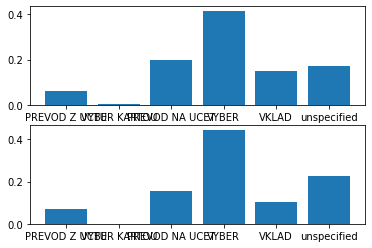

In [ ]:
from matplotlib import pyplot
operation = ['PREVOD Z UCTU','VYBER KARTOU','PREVOD NA UCET','VYBER','VKLAD','unspecified']    #not including outliers (unspecified operation and operation)
p = [65226/1048575, 7706/1048575, 208283/1048575, 432477/1048575, 156320/1048575, 178663/1048575]
q = [701/10000, 6/10000, 1542/10000, 4452/10000, 1041/10000, 2258/10000]  
print('P=%.3f Q=%.3f' % (sum(p), sum(q)))
# plot first distribution
pyplot.subplot(2,1,1)
pyplot.bar(operation, p)
# plot second distribution
pyplot.subplot(2,1,2)
pyplot.bar(operation, q)
# show the plot
pyplot.show()

In [ ]:
from math import log2
# calculate the kl divergence
def kl_divergence(p, q):
    return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))

# calculate (P || Q)
kl_pq = kl_divergence(p, q) 
print(kl_pq)

0.05094785397744099


In [ ]:
# calculate (Q||P)
kl_qp = kl_divergence(q,p)
print(kl_qp)

0.040466388299373414


***KL Divergence for 'k_symbol' column***

In [ ]:
# KL Divergence - 'k_symbol' column
df['k_symbol'].value_counts(ascending = True)

SANKC. UROK      1527
UVER            13580
POJISTNE        18500
DUCHOD          30338
SIPO           118057
SLUZBY         155832
UROK           178663
unspecified    532078
Name: k_symbol, dtype: int64

In [ ]:
samples['k_symbol'].value_counts(ascending = True)

UVER              9
SANKC. UROK      37
POJISTNE         53
DUCHOD          672
SIPO            762
SLUZBY         1267
UROK           2150
unspecified    5050
Name: k_symbol, dtype: int64

P=1.000 Q=126710000.873


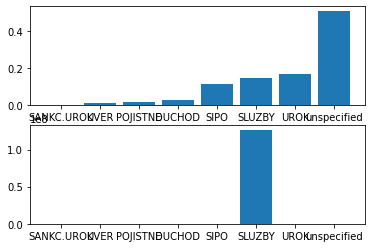

In [ ]:
from matplotlib import pyplot
k_symbol = ['SANKC.UROK', 'UVER','POJISTNE','DUCHOD','SIPO','SLUZBY','UROK','unspecified']                     
p = [1527/1048575, 13580/1048575, 18500/1048575, 30338/1048575, 118057/1048575, 155832/1048575, 178663/1048575, 532078/1048575]
q = [37/10000, 9/10000, 53/10000, 672/10000, 762/10000, 126710000, 2150/10000, 5050/10000]
print('P=%.3f Q=%.3f' % (sum(p), sum(q)))
# plot first distribution
pyplot.subplot(2,1,1)
pyplot.bar(k_symbol, p)
# plot second distribution
pyplot.subplot(2,1,2)
pyplot.bar(k_symbol, q)
# show the plot
pyplot.show()

In [ ]:
from math import log2
# calculate the kl divergence
def kl_divergence(p, q):
    return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))

# calculate (P || Q)
kl_pq = kl_divergence(p, q) 
print(kl_pq)

-4.355901329558758


In [ ]:
# calculate (Q||P)
kl_qp = kl_divergence(q,p)
print(kl_qp)

3759146342.271576
